# **House Prices - Advanced Regression Techniques** 

(https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/) - *projekt na Uczenie Maszynowe*

*by Bartosz Rogowski & Aleksandra Rolka*


In [1]:
# to uncomment when running from Google collab

# from google.colab import drive
# drive.mount('/content/drive')

# !unzip drive/Shareddrives/ML-team/house-prices-advanced-regression-techniques.zip -d data
# data_folder_path = '/content/data'

In [24]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib as plt
import seaborn as sns

In [13]:
data_folder_path ='.' # to remove after uploading on Google collab
train_data = pd.read_csv(data_folder_path+"/train.csv")
test_data = pd.read_csv(data_folder_path+"/test.csv")
test_data_real_prices = pd.read_csv(data_folder_path+"/sample_submission.csv")

In [14]:
def encode_not_numeric_collumns(df):
  for column_name in df:
    if not is_numeric_dtype(df[column_name]):
      unique_values_dict = dict(enumerate(df[column_name].unique()))
      unique_values_dict = dict((v, k) for k, v in unique_values_dict.items())
      df[column_name] = df[column_name].map(unique_values_dict)
  return df

In [15]:
train_data = encode_not_numeric_collumns(train_data)
test_data = encode_not_numeric_collumns(test_data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,0,80.0,11622,0,0,0,0,0,...,120,0,0,0,0,0,6,2010,0,0
1,1462,20,1,81.0,14267,0,0,1,0,0,...,0,0,0,1,1,12500,6,2010,0,0
2,1463,60,1,74.0,13830,0,0,1,0,0,...,0,0,0,0,0,0,3,2010,0,0
3,1464,60,1,78.0,9978,0,0,1,0,0,...,0,0,0,1,0,0,6,2010,0,0
4,1465,120,1,43.0,5005,0,0,1,1,0,...,144,0,0,1,0,0,1,2010,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,2,21.0,1936,0,0,0,0,0,...,0,0,0,1,0,0,6,2006,0,0
1455,2916,160,2,21.0,1894,0,0,0,0,0,...,0,0,0,1,0,0,4,2006,0,2
1456,2917,20,1,160.0,20000,0,0,0,0,0,...,0,0,0,1,0,0,9,2006,0,2
1457,2918,85,1,62.0,10441,0,0,0,0,0,...,0,0,0,0,2,700,7,2006,0,0


In [16]:
# sns.pairplot(data=train_data)

In [17]:
train_data.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.011949,-0.010601,-0.033226,-0.008916,-0.000293,-0.024071,0.014769,0.013324,...,0.057044,0.066509,0.005029,-0.014074,-0.006242,0.021172,0.000712,-0.016932,-0.017712,-0.021917
MSSubClass,0.011156,1.000000,0.286937,-0.386347,-0.139781,0.024969,0.179144,-0.115361,-0.018947,-0.022844,...,0.008283,0.010353,-0.080209,-0.016437,-0.007683,-0.013585,-0.021407,0.012874,-0.015047,-0.084284
MSZoning,-0.011949,0.286937,1.000000,-0.248800,-0.161640,0.039678,0.399270,-0.167918,-0.013396,-0.011167,...,-0.029301,-0.027587,-0.074069,-0.029479,-0.021573,0.022231,-0.010621,0.058948,0.068705,-0.116047
LotFrontage,-0.010601,-0.386347,-0.248800,1.000000,0.426095,0.040886,-0.190957,0.231878,0.096766,NaN,...,0.206167,0.219815,0.037457,0.007872,0.003368,0.011200,0.007450,0.006370,0.072517,0.351799
LotArea,-0.033226,-0.139781,-0.161640,0.426095,1.000000,0.197131,-0.083668,0.315484,0.258792,0.010123,...,0.077672,0.093908,-0.030856,0.089707,0.038068,0.001205,-0.014261,-0.013882,0.000199,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,0.022231,0.011200,0.001205,-0.003690,-0.021453,0.026617,0.063280,-0.051552,...,-0.033737,-0.033227,0.011360,0.019292,-0.006495,1.000000,-0.145721,0.040201,0.054679,0.046432
YrSold,0.000712,-0.021407,-0.010621,0.007450,-0.014261,0.025043,-0.012036,-0.037391,-0.026117,0.023353,...,-0.059689,-0.046232,0.012714,0.043235,0.004906,-0.145721,1.000000,-0.021683,-0.123720,-0.028923
SaleType,-0.016932,0.012874,0.058948,0.006370,-0.013882,0.021171,-0.000025,0.001435,-0.014537,0.057455,...,-0.009887,-0.002809,-0.027036,0.014543,-0.014143,0.040201,-0.021683,1.000000,0.232149,0.072896
SaleCondition,-0.017712,-0.015047,0.068705,0.072517,0.000199,0.022919,0.026551,-0.004773,0.062826,0.019173,...,0.068578,0.071651,-0.032209,-0.047231,-0.032655,0.054679,-0.123720,0.232149,1.000000,0.142503


<AxesSubplot:>

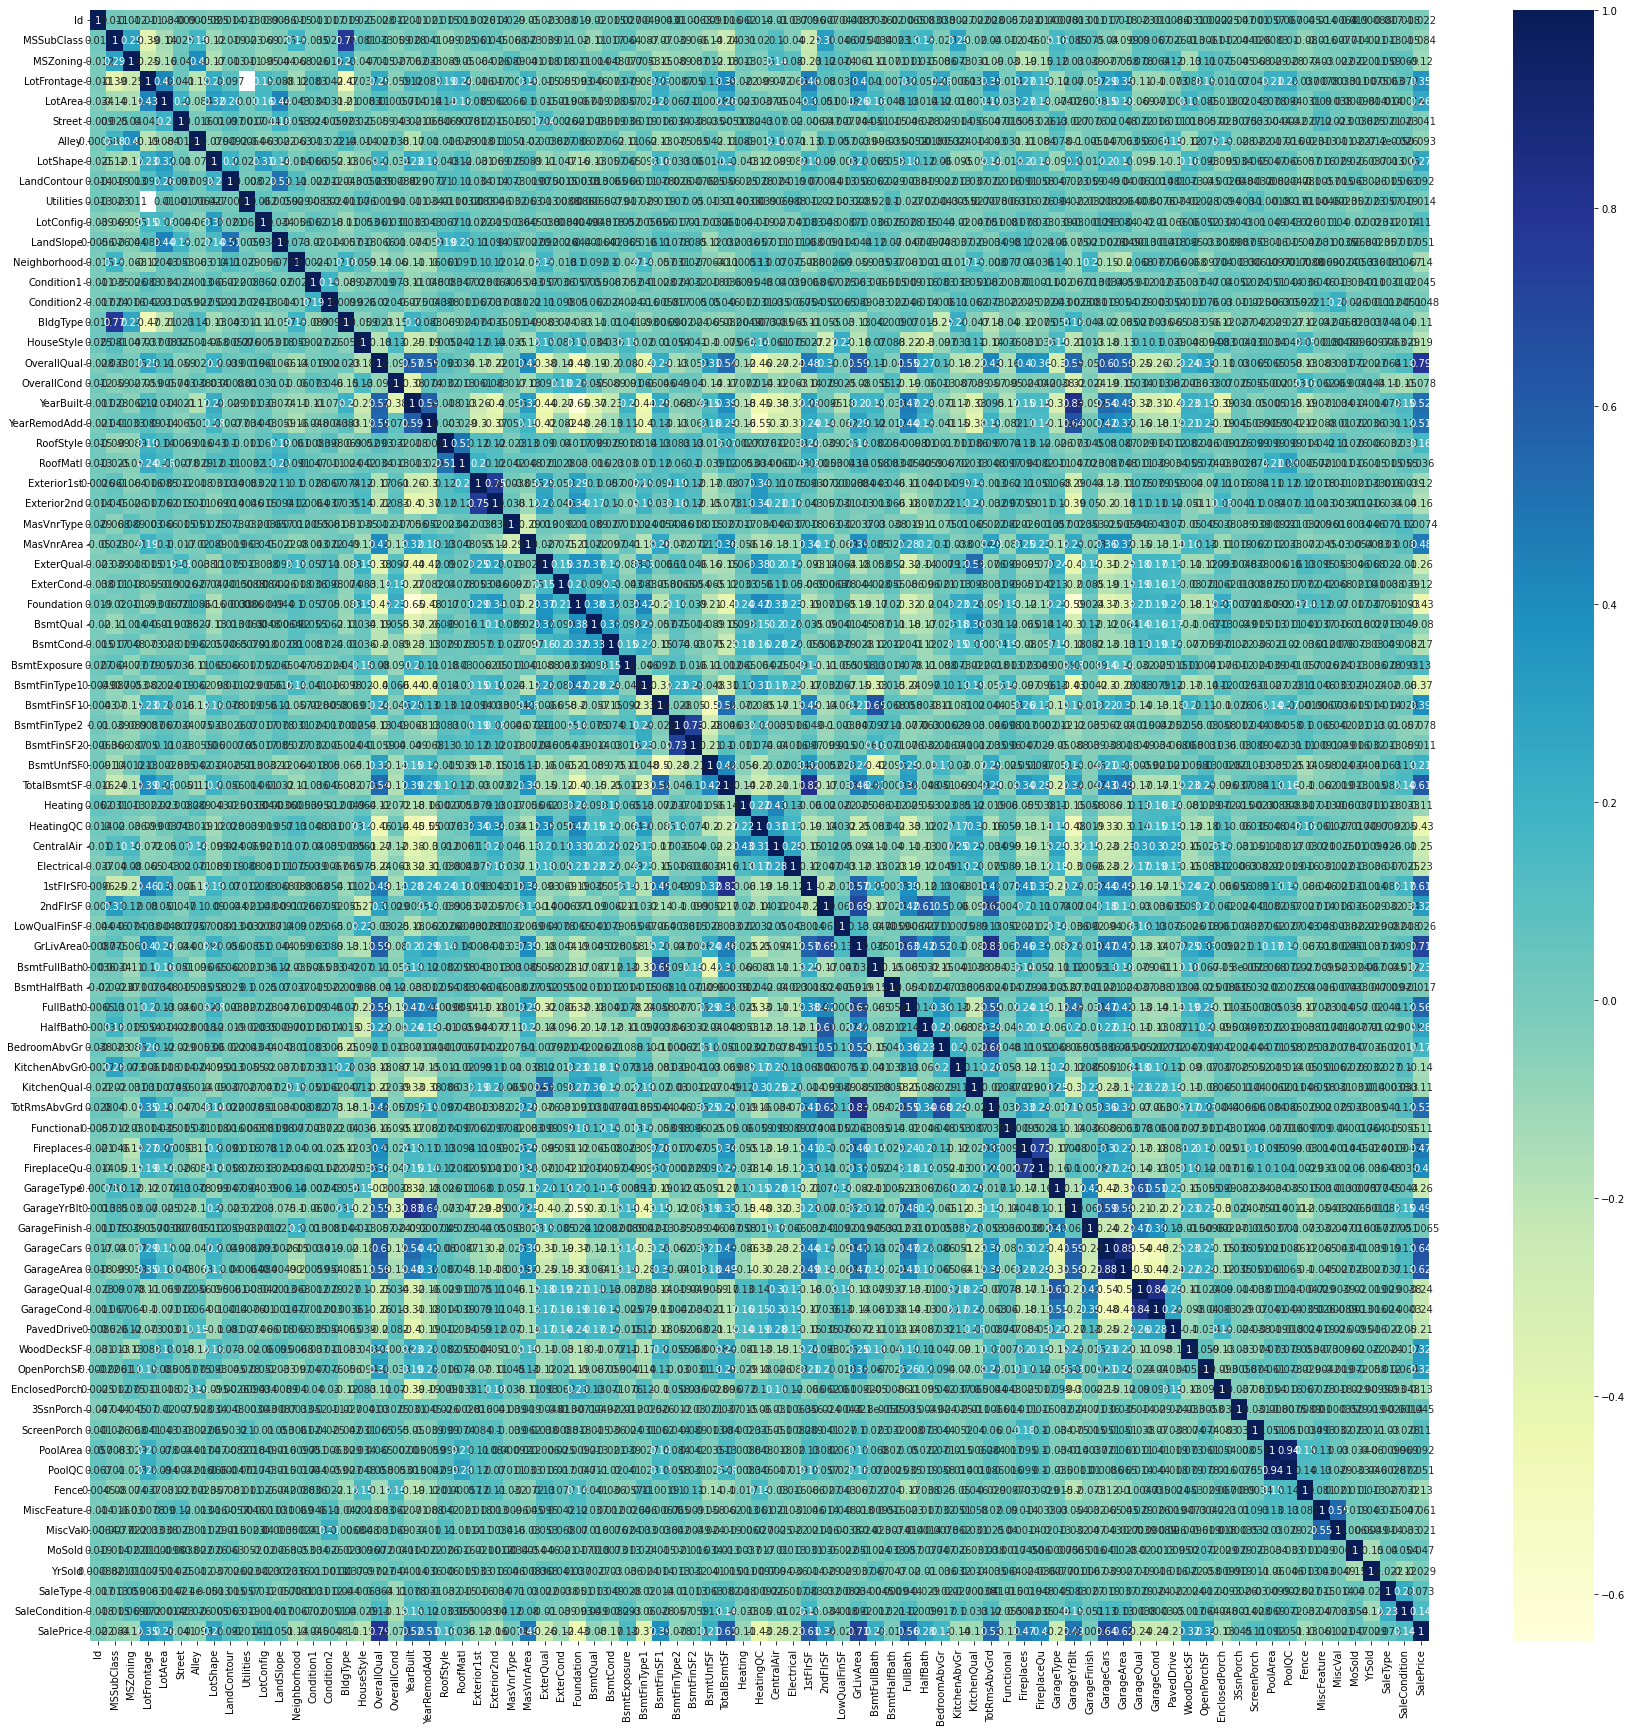

In [30]:
plt.rcParams['figure.figsize'] = [30, 30]
sns.heatmap(train_data[1:].corr(), cmap="YlGnBu", annot=True)